In [ ]:
Problem Statement
Context:
AeroFit, a company specializing in treadmills, offers three distinct treadmill models catering to different
customer segments: KP281 (entry-level), KP481 (mid-level), and KP781 (advanced). The company aims to enhance its marketing
 and sales strategies by understanding the characteristics of customers who purchase each treadmill model.
 The goal is to develop targeted recommendations for new customers based on insights derived from the existing customer data.

Objective:
To perform descriptive analytics on the dataset of treadmill purchasers to create detailed customer profiles for
each treadmill model (KP281, KP481, KP781). This involves identifying and analyzing the differences in customer
characteristics associated with each treadmill model. The analysis should inform AeroFit about the typical customer profiles
for each product and guide the development of personalized recommendations.

Data:
The dataset includes information on:

Product Purchased (KP281, KP481, KP781)
Age (in years)
Gender (Male/Female)
Education (in years)
Marital Status (Single/Partnered)
Usage (average number of times the treadmill is used each week)
Income (annual income in $)
Fitness (self-rated fitness on a 1-to-5 scale)
Miles (average number of miles walked/run each week)
Analysis Steps:
Data Exploration:

Import the dataset and perform initial data analysis to understand the structure and characteristics.
Detect and handle outliers using statistical methods and visualizations.
Descriptive Statistics:

Generate summary statistics and visualizations (e.g., histograms, boxplots) to describe the distribution of each feature.
Customer Profiling:

Create two-way contingency tables for each treadmill model to explore the relationships between product purchases
and customer characteristics (e.g., age, gender, income).
Compute marginal and conditional probabilities to understand the likelihood of certain characteristics associated with each treadmill model.
Probability Analysis:

Calculate and interpret the marginal probability of purchasing each treadmill model.
Assess conditional probabilities, such as the probability of a male customer buying a KP781 treadmill.
Correlation Analysis:

Analyze correlations among different factors using heat maps or pair plots to identify significant relationships.
Insights and Recommendations:

Based on the analysis, provide actionable insights and recommendations for targeted marketing strategies.
Suggest ways to leverage customer profiles to enhance product recommendations and customer engagement.
Expected Outcomes:
Customer Profiles: Detailed profiles for each treadmill model, including typical age ranges, income levels, fitness ratings,
 and other relevant characteristics.
Probabilistic Insights: Quantitative insights into the likelihood of purchasing each treadmill model based on various customer attributes.
Actionable Recommendations: Strategic recommendations to tailor marketing efforts and improve customer targeting based
on the identified customer profiles.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
df=pd.read_csv('gdrive/My Drive/aerofit_treadmill.csv')

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
#Range of values
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


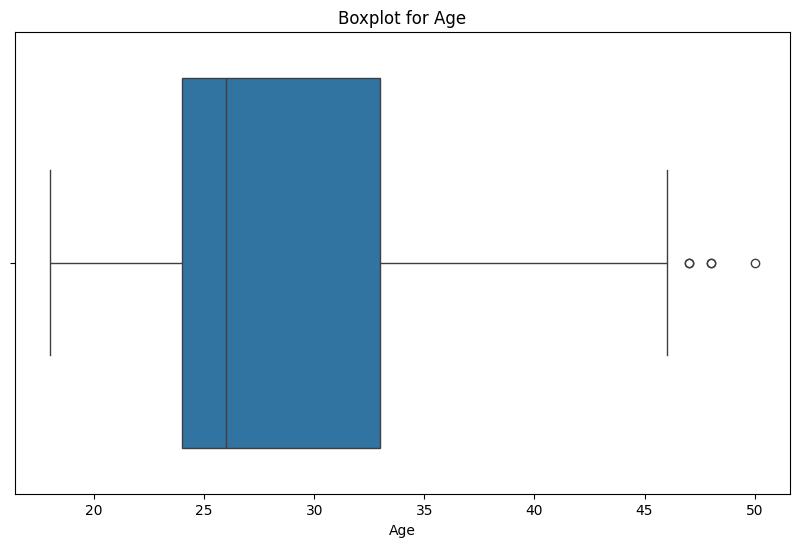

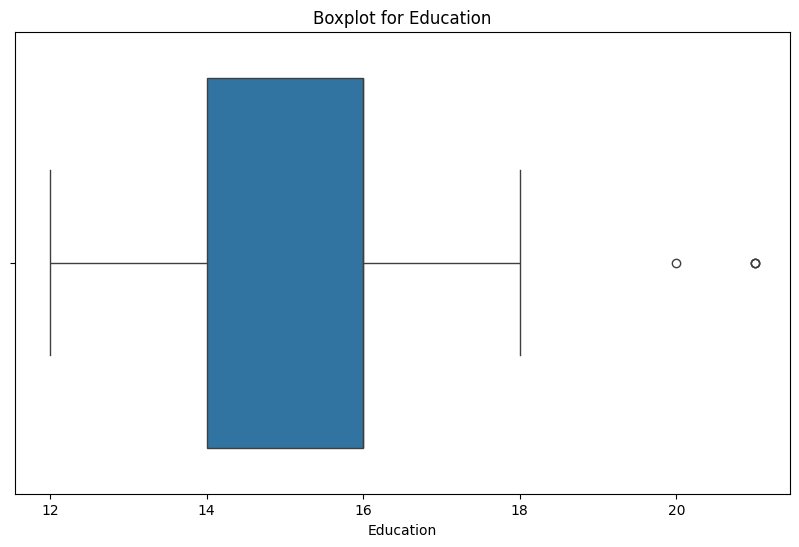

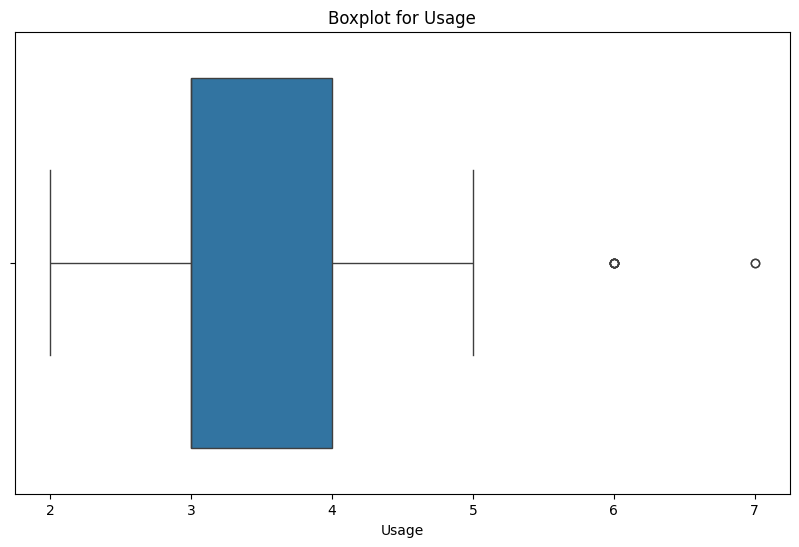

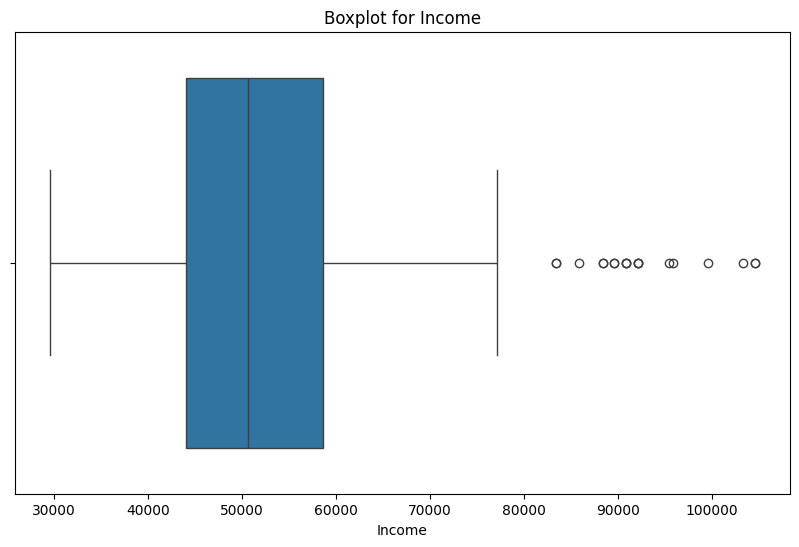

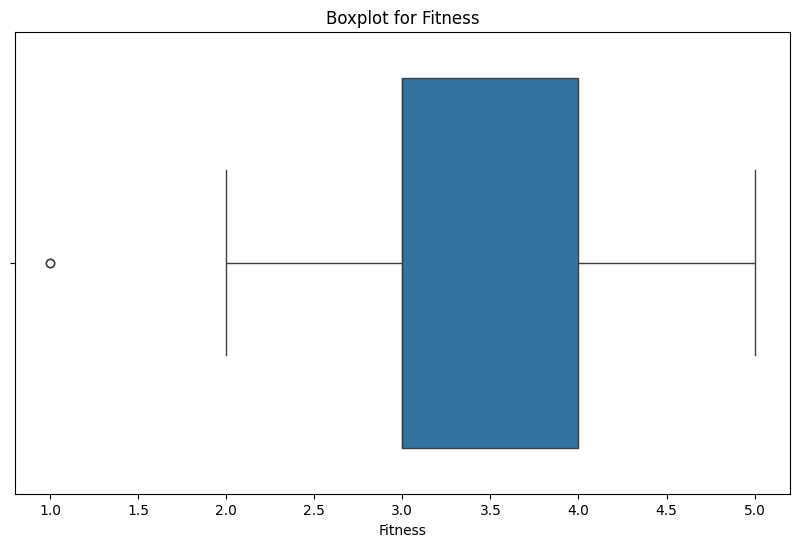

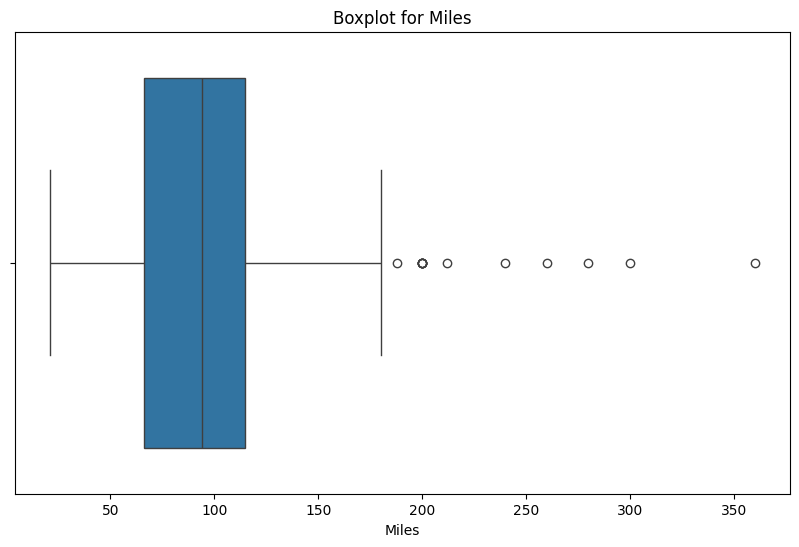

In [ ]:
#1. Detect outliers for most of the attibutes and check range values.

numerical_columns = ['Age', 'Education', 'Usage', 'Income', 'Fitness', 'Miles']

# Generate boxplots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(df[column],orient="h")
    plt.title(f'Boxplot for {column}')
    plt.show()

In [ ]:
# Calculate summary statistics
summary = df.describe()

# Function to detect outliers using IQR
def detect_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Identify and print outliers for each numerical column
for column in numerical_columns:
    outliers = detect_outliers_iqr(column)
    print(f'Number of outliers in {column}: {len(outliers)}')
    if len(outliers) > 0:
        print(outliers[[column]].head())

Number of outliers in Age: 5
     Age
78    47
79    50
139   48
178   47
179   48
Number of outliers in Education: 4
     Education
156         20
157         21
161         21
175         21
Number of outliers in Usage: 9
     Usage
154      6
155      6
162      6
163      7
164      6
Number of outliers in Income: 19
     Income
159   83416
160   88396
161   90886
162   92131
164   88396
Number of outliers in Fitness: 2
     Fitness
14         1
117        1
Number of outliers in Miles: 13
     Miles
23     188
84     212
142    200
148    200
152    200


In [ ]:
Less outliers in Fitness which is 1 that indicates low fitness. We can infer that fitness (3)
for most on the scale from 1 to 5 is good. So customers are into working out and not under medical advise to refrain from exercise.
Miles outlier > 188 miles. Age >47 is outlier.

In [ ]:
for column in numerical_columns:
    mean = df[column].mean()
    median = df[column].median()
    difference = mean - median
    print(f'Difference between mean and median for {column}: {difference}')

Difference between mean and median for Age: 2.788888888888888
Difference between mean and median for Education: -0.42777777777777715
Difference between mean and median for Usage: 0.4555555555555557
Difference between mean and median for Income: 3123.0777777777766
Difference between mean and median for Fitness: 0.3111111111111109
Difference between mean and median for Miles: 9.194444444444443


In [ ]:
Indicates the skewness:
close to median - Age,Usage,Fitness ,distribution is balanced and does not have much outliers.
High Positive skew for Income. It is concentrated towards low range.
Education is negative which means datapoints are concentrated towards right - high range.


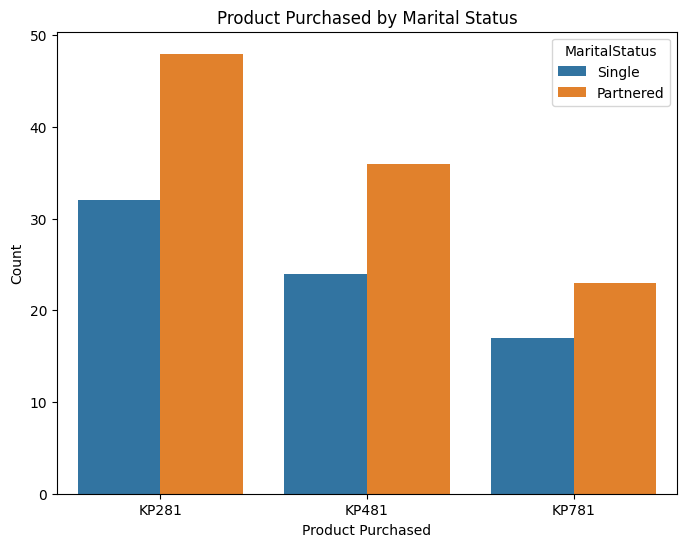

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Product', hue='MaritalStatus', data=df)
plt.title('Product Purchased by Marital Status')
plt.xlabel('Product Purchased')
plt.ylabel('Count')
plt.show()

In [ ]:
Inference - Product purchased is higher for partnered than single customers.

In [ ]:
3.Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table
 (can use pandas.crosstab here)



In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
threshold_Age = df['Age'].median()
threshold_Education = df['Education'].median()
threshold_Usage = df['Usage'].median()
threshold_Fitness = df['Fitness'].median()
threshold_Income = df['Income'].median()
threshold_Miles = df['Miles'].median()



In [ ]:
Threshold_Age ,Threshold_Education ,Threshold_Usage,Threshold_Fitness,Threshold_Income,threshold_Miles

(26.0, 16.0, 3.0, 3.0, 50596.5, 94.0)

In [ ]:
thresholds = {
    'Age': 26,
    'Education': 16,
    'Usage': 3,
    'Fitness': 3,
    'Income': 50596,
    'Miles': 94
}

data=[]
for col,threshold in thresholds.items():
  df[col] =(df[col]>threshold).astype(int)

In [ ]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,0,Male,0,Single,0,1,0,1
1,KP281,0,Male,0,Single,0,0,0,0
2,KP281,0,Female,0,Partnered,1,0,0,0
3,KP281,0,Male,0,Single,0,0,0,0
4,KP281,0,Male,0,Partnered,1,0,0,0
...,...,...,...,...,...,...,...,...,...
175,KP781,1,Male,1,Single,1,1,1,1
176,KP781,1,Male,1,Single,1,1,1,1
177,KP781,1,Male,0,Single,1,1,1,1
178,KP781,1,Male,1,Partnered,1,1,1,1


In [ ]:
#Marginal probability , Threshold- 'Age': 26
pd.crosstab(df['Age'],
            df['Product'],
            margins=True,)

Product,KP281,KP481,KP781,All
Age,,,,
0,41,31,19,91
1,39,29,21,89
All,80,60,40,180


In [ ]:
pd.crosstab(df['Age'],
            df['Product'],
            normalize=True,)

Product,KP281,KP481,KP781
Age,,,
0,0.227778,0.172222,0.105556
1,0.216667,0.161111,0.116667


In [ ]:
Age is below 26, the probability is more for KP281 which i s slightly higher than age >26 followed by KP481 and KP781.Otherwise also its KP281.

In [ ]:
#   'Education': 16,
pd.crosstab(df['Education'],
            df['Product'],
            margins=True,)

Product,KP281,KP481,KP781,All
Education,,,,
0,78,58,17,153
1,2,2,23,27
All,80,60,40,180


In [ ]:
pd.crosstab(df['Education'],
            df['Product'],
            normalize=True,)

Product,KP281,KP481,KP781
Education,,,
0,0.433333,0.322222,0.094444
1,0.011111,0.011111,0.127778


In [ ]:
#Education less than 16 years has high probablity of Product KP281 Followed by KP481. Overall they have more probablity.
# More Educated prefer KP781 which is more expensive.

In [ ]:
pd.crosstab(df['Usage'],
            df['Product'],
            margins=True,)

Product,KP281,KP481,KP781,All
Usage,,,,
0,56,45,1,102
1,24,15,39,78
All,80,60,40,180


In [ ]:

pd.crosstab(df['Usage'],
            df['Product'],
            normalize=True,)

Product,KP281,KP481,KP781
Usage,,,
0,0.311111,0.250000,0.005556
1,0.133333,0.083333,0.216667


In [ ]:
pd.crosstab(df['Income'],
            df['Product'],
            margins=True,)

Product,KP281,KP481,KP781,All
Income,,,,
0,50,35,5,90
1,30,25,35,90
All,80,60,40,180


In [ ]:
pd.crosstab(df['Income'],
            df['Product'],
            normalize=True,)

Product,KP281,KP481,KP781
Income,,,
0,0.277778,0.194444,0.027778
1,0.166667,0.138889,0.194444


In [ ]:
# Inference - For Income , all marginal probablity is same when it comes to above median. Uniform distribution of probability.
 #Probability more for KP281 in low income ,  KP781 for high income.

In [ ]:
pd.crosstab(df['Miles'],
            df['Product'],
            margins=True,)

Product,KP281,KP481,KP781,All
Miles,,,,
0,62,32,1,95
1,18,28,39,85
All,80,60,40,180


In [ ]:
pd.crosstab(df['Miles'],
            df['Product'],
            normalize=True,)

Product,KP281,KP481,KP781
Miles,,,
0,0.344444,0.177778,0.005556
1,0.100000,0.155556,0.216667


In [ ]:
# If miles per week is less than  - 94 miles , then probablity is more for KP281 followed by KP481 and very less for
 KP781. If more than 98 miles, then more probablity for KP781.

In [ ]:
pd.crosstab(df['Fitness'],
            df['Product'],
            normalize=True,)

Product,KP281,KP481,KP781
Fitness,,,
0,0.383333,0.288889,0.022222
1,0.061111,0.044444,0.200000


In [ ]:
#Those who have rated more than 3, uses KP781 ! if Rated less fit, then KP281.

In [ ]:
#Conditional Probablity

#threshold_Age ,threshold_Education ,threshold_Usage,threshold_Fitness,threshold_Income,threshold_Miles

condition1 = (df['Age'] == 1) & (df['Education'] == 1) & (df['Usage'] == 1) & (df['Fitness'] == 1) & (df['Miles'] == 1)

# Calculate the probability
total_condition1 = df[condition1].shape[0]
total_condition1_and_Gender = df[condition1 & (df['Gender'] == 'Male')].shape[0]

probability = total_condition1_and_Gender / total_condition1

In [ ]:
The conditional probability of Male customer having Age , Education, Usage, Fitness, Miles above threshold is as below.

0.8461538461538461

In [ ]:
# Threshold_Age ,threshold_Education ,threshold_Usage,threshold_Fitness,threshold_Income,threshold_Miles
(26.0, 16.0, 3.0, 3.0, 50596.5, 94.0)



In [ ]:
condition1 = (df['Age'] == 1) & (df['Education'] == 1) & (df['Usage'] == 1) & (df['Fitness'] == 1) & (df['Miles'] == 1)

# Calculate the probability
total_condition1 = df[condition1].shape[0]
total_condition1_and_MS = df[condition1 & (df['MaritalStatus'] == 'Partnered')].shape[0]

probability_MS = total_condition1_and_MS / total_condition1
probability_MS

0.6923076923076923

In [ ]:
condition2=(df['Age'] == 1) & (df['Education'] == 1) & (df['Usage'] == 1) & (df['Fitness'] == 1) & (df['Miles'] == 1) & (df['Gender'] == 'Male')
total_condition2 = df[condition2].shape[0]
total_condition2_and_MS = df[condition2 & (df['MaritalStatus'] == 'Partnered')].shape[0]

probability_Cond_Male_M = total_condition2_and_MS / total_condition2
probability_Cond_Male_M


0.6363636363636364

In [ ]:
#The conditional probablity of Male customer who is Married/Partnered and above threshold for in all other attributes.
condition3=(df['Age'] == 1) & (df['Education'] == 1) & (df['Usage'] == 1) & (df['Fitness'] == 1) & (df['Miles'] == 1) & (df['MaritalStatus']
                                                                                                                         == 'Partnered')
total_condition3 = df[condition3].shape[0]
total_condition3_and_MS = df[condition3 & (df['Gender'] == 'Male')].shape[0]

probability_Cond_M_Male = total_condition3_and_MS / total_condition3
probability_Cond_M_Male

0.7777777777777778

In [ ]:
#The conditional probablity of FeMale customer who is Married/Partnered and above threshold for in all other attributes.
condition3=(df['Age'] == 1) & (df['Education'] == 1) & (df['Usage'] == 1) & (df['Fitness'] == 1) & (df['Miles'] == 1) & (df['MaritalStatus']
                                                                                                                         == 'Partnered')
total_condition3 = df[condition3].shape[0]
total_condition3_and_MS = df[condition3 & (df['Gender'] == 'Female')].shape[0]

probability_Cond_M_FMale = total_condition3_and_MS / total_condition3
probability_Cond_M_FMale

0.2222222222222222

In [ ]:
#The conditional probablity of FeMale customer who is Married/Partnered and below threshold for in all other attributes.
condition3=(df['Age'] == 0) & (df['Education'] == 0) & (df['Usage'] == 0) & (df['Fitness'] == 0) & (df['Miles'] == 0) & (df['MaritalStatus'] == 'Partnered')
total_condition3 = df[condition3].shape[0]
total_condition3_and_MS = df[condition3 & (df['Gender'] == 'Female')].shape[0]

probability_Cond_M_FMale = total_condition3_and_MS / total_condition3
probability_Cond_M_FMale

0.4782608695652174

In [ ]:
# Marital status has impact on Probablity  customers.
import seaborn as sns
Margin = pd.crosstab(index = [df['Gender'], df['Age'],df['Education'],df['Income']],
            columns = df['MaritalStatus'],
            margins=True,)
Margin

MaritalStatus                Partnered  Single  All
Gender Age Education Income                        
Female 0   0         0              17      15   32
                     1               2       1    3
           1         1               1       2    3
       1   0         0               9       4   13
                     1              15       5   20
           1         0               0       1    1
                     1               2       2    4
Male   0   0         0              17      21   38
                     1               5       4    9
           1         0               0       1    1
                     1               5       0    5
       1   0         0               3       2    5
                     1              23      10   33
           1         1               8       5   13
All                                107      73  180

In [ ]:
pd.crosstab(index = [df['Gender'], df['Age'],df['Education'],df['Income']],
            columns = df['MaritalStatus'],
            normalize=True,)

MaritalStatus                Partnered    Single
Gender Age Education Income                     
Female 0   0         0        0.094444  0.083333
                     1        0.011111  0.005556
           1         1        0.005556  0.011111
       1   0         0        0.050000  0.022222
                     1        0.083333  0.027778
           1         0        0.000000  0.005556
                     1        0.011111  0.011111
Male   0   0         0        0.094444  0.116667
                     1        0.027778  0.022222
           1         0        0.000000  0.005556
                     1        0.027778  0.000000
       1   0         0        0.016667  0.011111
                     1        0.127778  0.055556
           1         1        0.044444  0.027778

In [ ]:
prod = pd.crosstab(index = [df['Gender'],df['Income']],
            columns = df['Product'],
            normalize=True,)

Mounted at /content/gdrive


<Axes: >

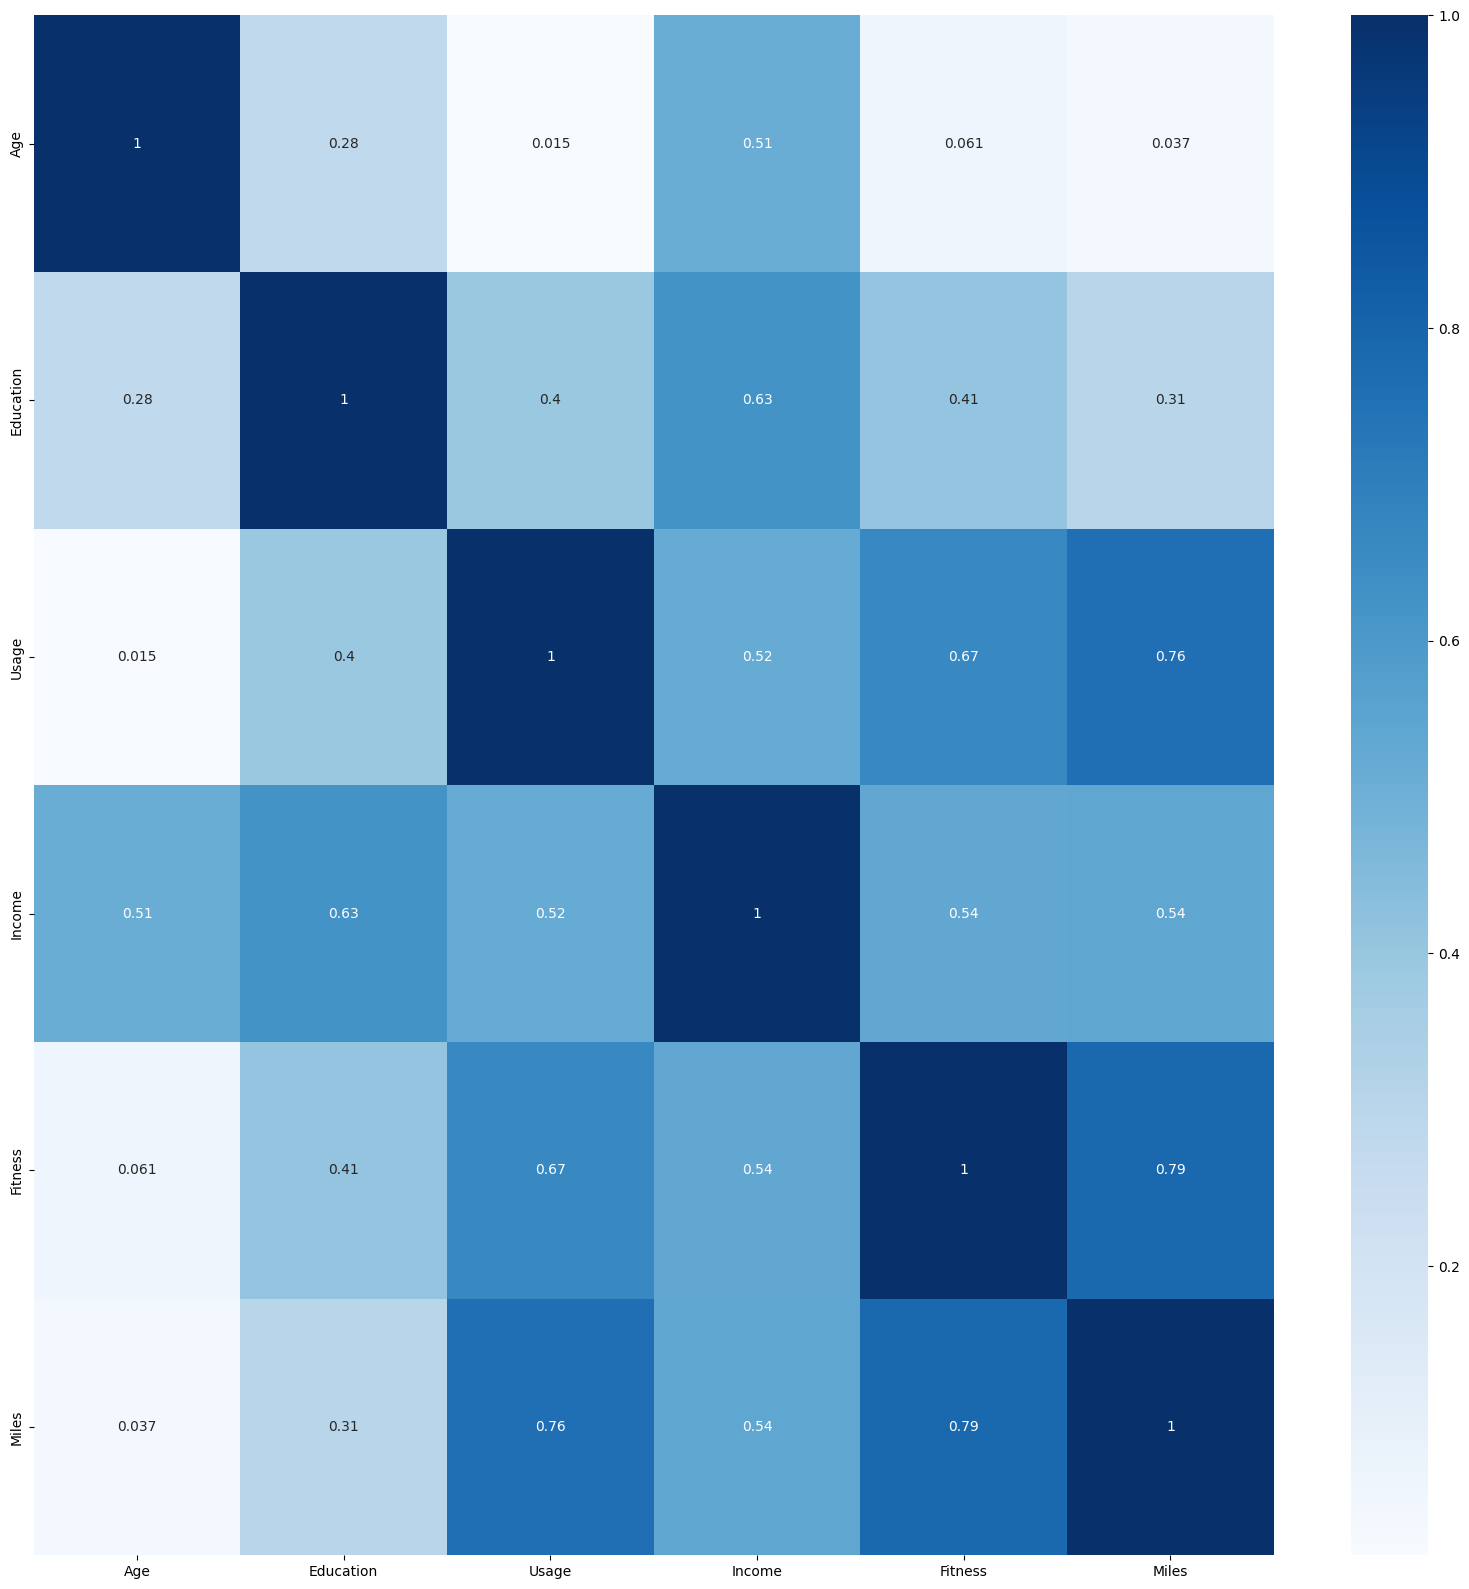

In [ ]:
#Heat map between Numerical variables:



from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
df=pd.read_csv('gdrive/My Drive/aerofit_treadmill.csv')

import matplotlib.pyplot as plt

numerical_columns = ['Age', 'Education', 'Usage', 'Income', 'Fitness', 'Miles']
threshold_Age = df['Age'].median()
threshold_Education = df['Education'].median()
threshold_Usage = df['Usage'].median()
threshold_Fitness = df['Fitness'].median()
threshold_Income = df['Income'].median()
threshold_Miles = df['Miles'].median()



thresholds = {
    'Age': 26,
    'Education': 16,
    'Usage': 3,
    'Fitness': 3,
    'Income': 50596,
    'Miles': 94
}

import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 20))
df1=pd.read_csv('gdrive/My Drive/aerofit_treadmill.csv')
df2=pd.DataFrame()
for column in numerical_columns:
    df2[column]=df1[column]
df2.head()
sns.heatmap(df2.corr(), cmap='Blues', annot=True)

In [ ]:
# insight - Strong correlation between Usage, Fitness and Miles

In [ ]:
#Male category with high income uses KP781 , lower income KP281, Female category uses KP281 for higher or lower income.

In [ ]:
#Univariate / Bivariate  Analysis

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
df1=pd.read_csv('gdrive/My Drive/aerofit_treadmill.csv')

<Axes: xlabel='Age', ylabel='Count'>

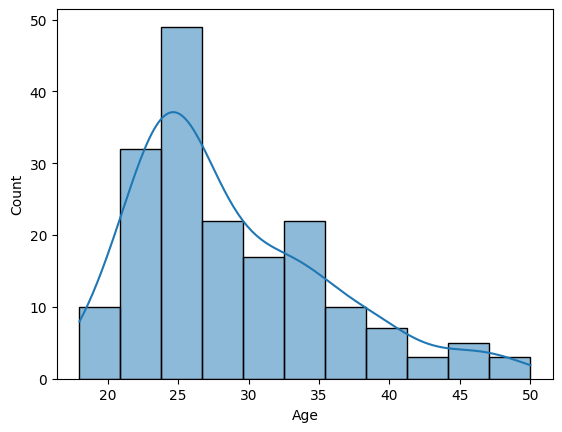

In [ ]:
sns.histplot(data = df1['Age'], kde = True)

<Axes: xlabel='Education', ylabel='Count'>

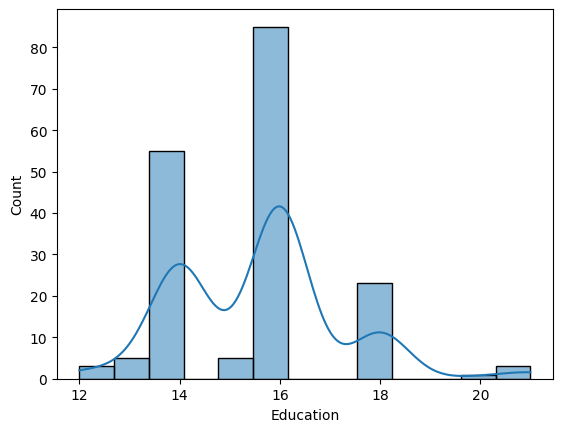

In [ ]:
sns.histplot(data = df1['Education'], kde = True)

<Axes: xlabel='Income', ylabel='Count'>

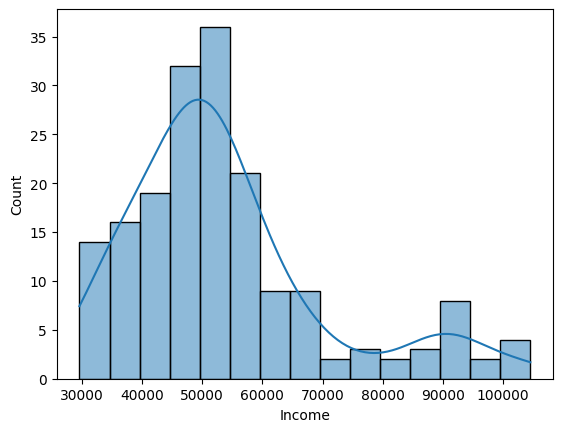

In [ ]:
sns.histplot(data = df1['Income'], kde = True)

<Axes: xlabel='Usage', ylabel='Count'>

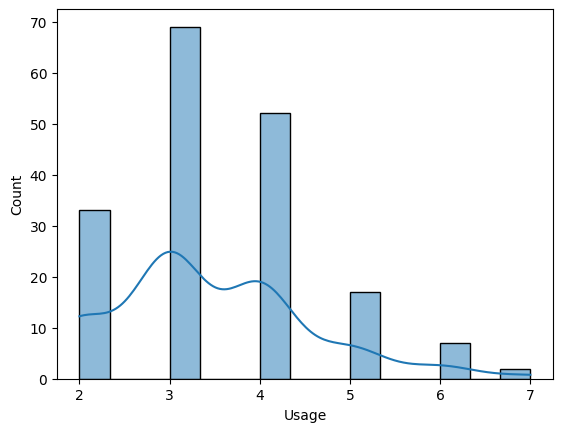

In [ ]:
sns.histplot(data = df1['Usage'], kde = True)

<Axes: xlabel='Fitness', ylabel='Count'>

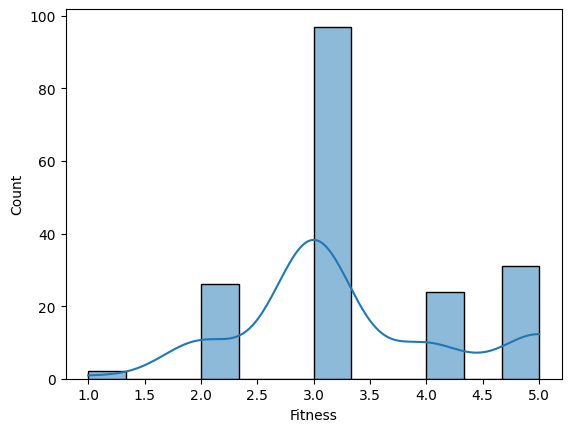

In [ ]:
sns.histplot(data = df1['Fitness'], kde = True)

<Axes: xlabel='Miles', ylabel='Count'>

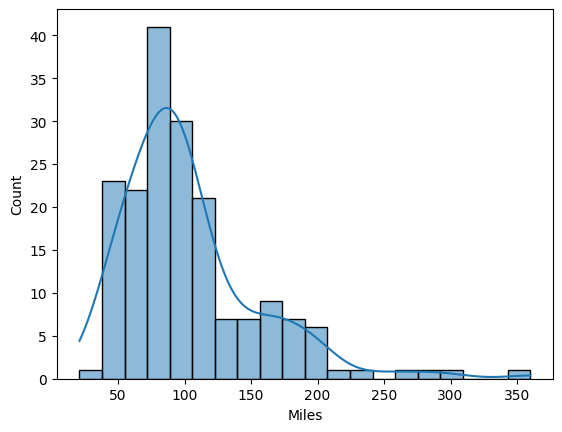

In [ ]:
sns.histplot(data = df1['Miles'], kde = True)

<Axes: ylabel='Gender'>

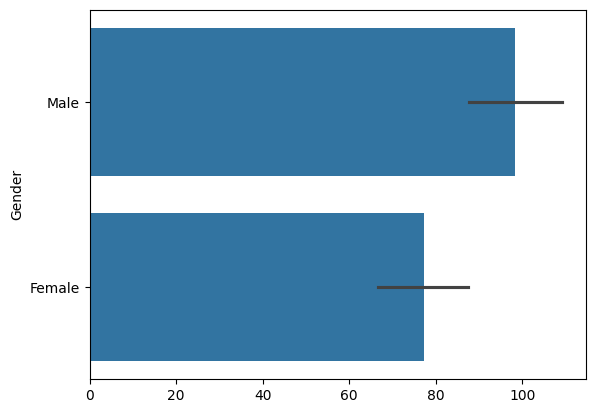

In [ ]:
sns.barplot(data = df1['Gender'])

<Axes: xlabel='MaritalStatus', ylabel='Count'>

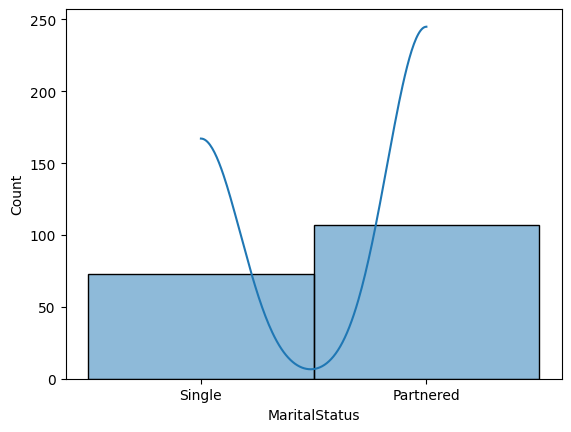

In [ ]:
sns.histplot(data = df1['MaritalStatus'], kde = True)

In [ ]:
#Insight :Younger customer base, with education upto 16 years, not high income group, mostly average fitness and Miles walked is less than 100. No of times usage is 3. Slightly more males and slightly more Partnered.

In [ ]:
#Bivariate & Multivariate

<Axes: xlabel='Age', ylabel='Income'>

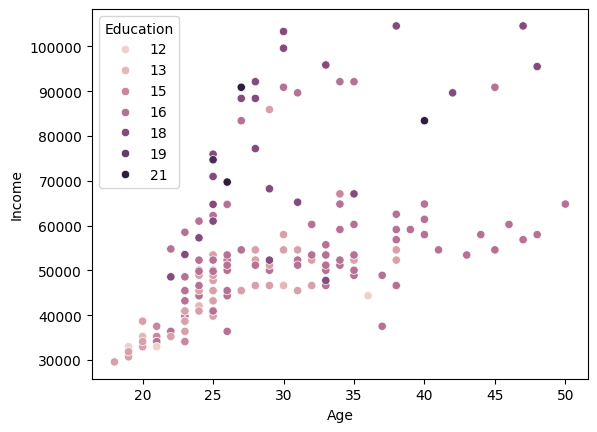

In [ ]:
sns.scatterplot(data=df1, x="Age", y="Income", hue="Education")

In [ ]:
# lesser Education and Lower income is towards younger age. Income is directly proportional to Education and distributed between all ages above 25.

<Axes: xlabel='Usage', ylabel='Miles'>

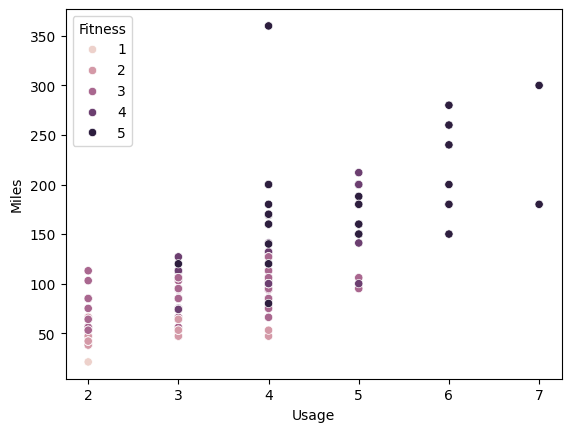

In [ ]:
sns.scatterplot(data=df1, x="Usage", y="Miles", hue="Fitness")

In [ ]:
# The more the Usage, more the Fitness. Miles also.

In [ ]:
# Product Multivariate analysis

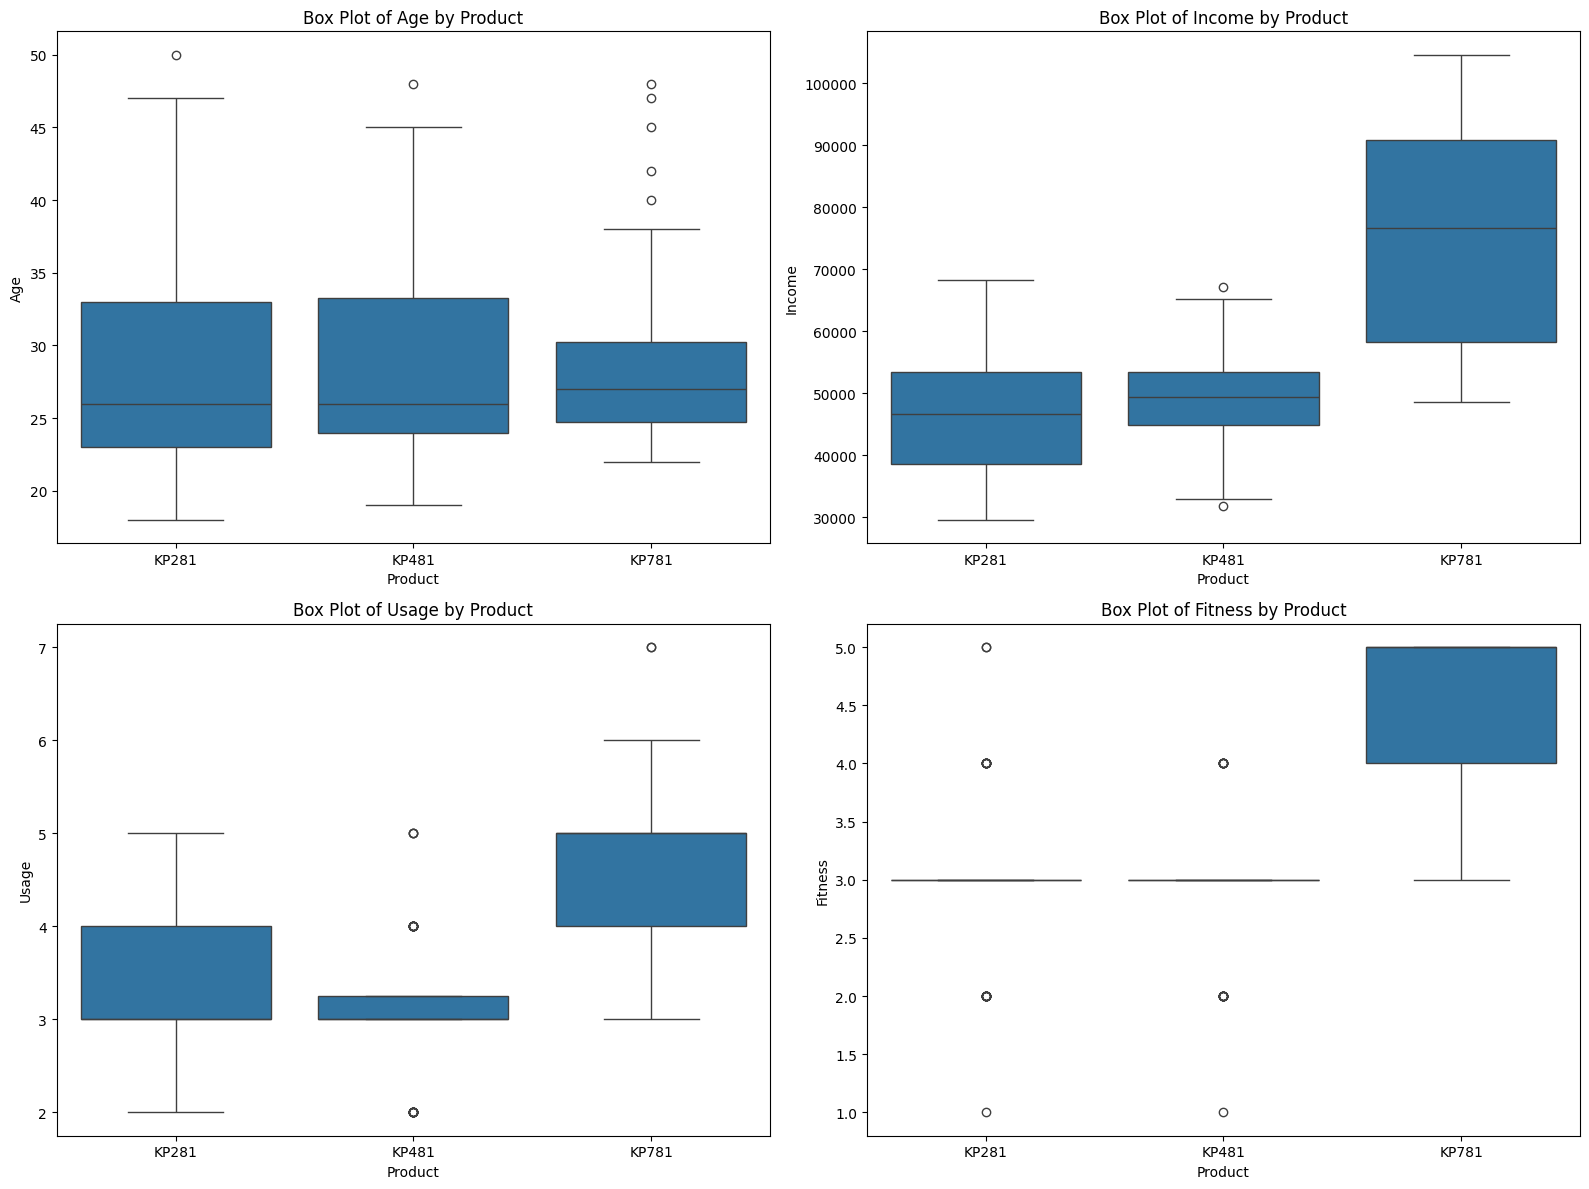

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Box plot for Age vs. Product
sns.boxplot(x='Product', y='Age', data=df1, ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of Age by Product')

# Box plot for Income vs. Product
sns.boxplot(x='Product', y='Income', data=df1, ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Income by Product')

# Box plot for Usage vs. Product
sns.boxplot(x='Product', y='Usage', data=df1, ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Usage by Product')

# Box plot for Fitness vs. Product
sns.boxplot(x='Product', y='Fitness', data=df1, ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Fitness by Product')

plt.tight_layout()
plt.show()

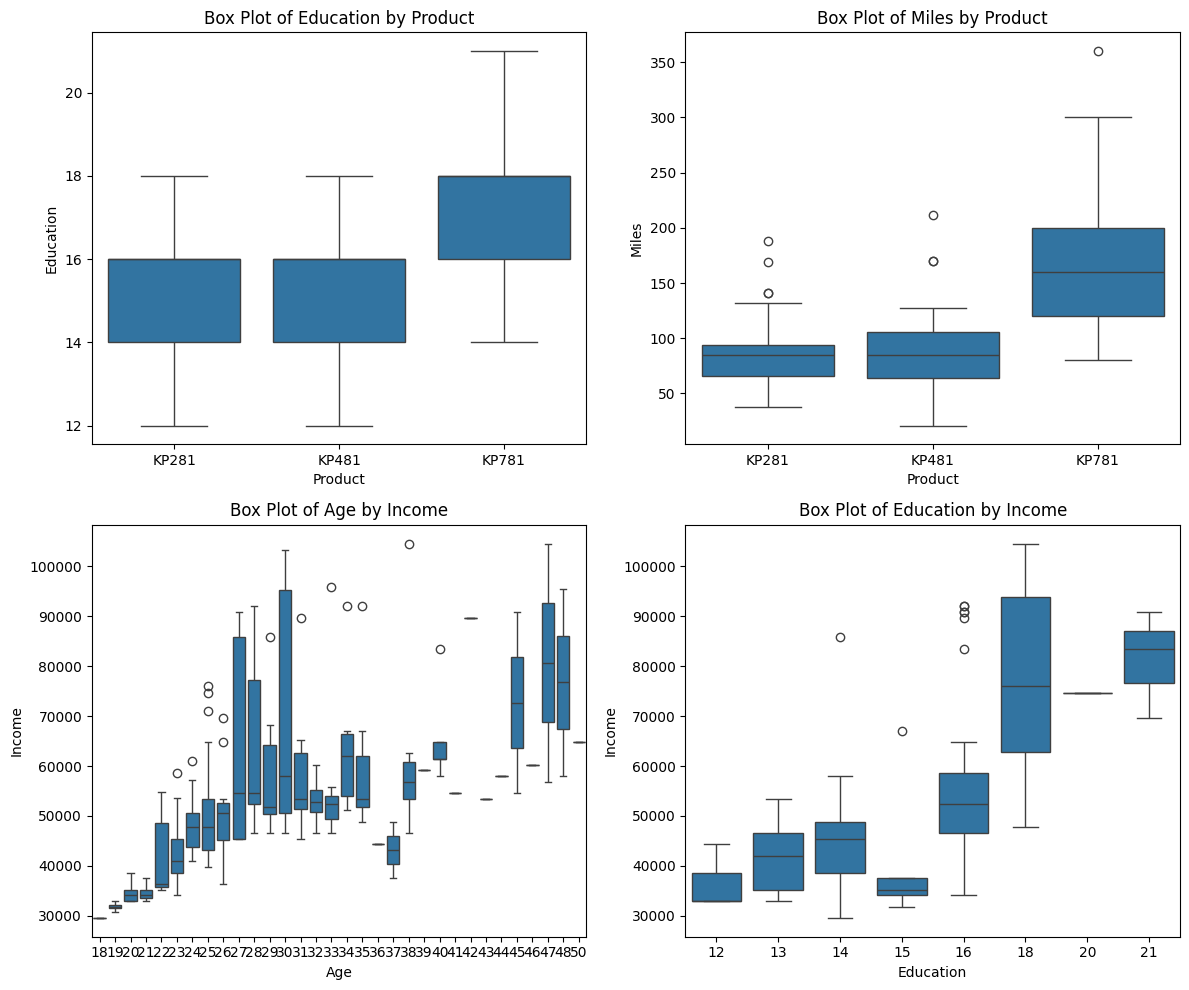

In [ ]:

import matplotlib.pyplot as plt
#['Age', 'Education', 'Usage', 'Income', 'Fitness', 'Miles']
fig, axes = plt.subplots(2,2, figsize=(12, 10))

# Box plot for Education vs. Product
sns.boxplot(x='Product', y='Education', data=df1, ax=axes[0, 0])
axes[0,0].set_title('Box Plot of Education by Product')

# Box plot for Miles vs. Product
sns.boxplot(x='Product', y='Miles', data=df1, ax=axes[0, 1])
axes[0,1].set_title('Box Plot of Miles by Product')

# Box plot for Age vs. Income
sns.boxplot(x='Age', y='Income', data=df1, ax=axes[1, 0])
axes[1,0].set_title('Box Plot of Age by Income')

# Box plot for Education vs. Income
sns.boxplot(x='Education', y='Income', data=df1, ax=axes[1, 1])
axes[1,1].set_title('Box Plot of Education by Income')
plt.tight_layout()
plt.show()

In [ ]:
Define Customer Profiles for Each Treadmill Model
1.1. KP281 (Entry-Level Treadmill):

Typical Customer Profile:
Gender: Likely balanced but may have a higher proportion of Females.
Age: Younger population, around 25 years old.
Education: Lower education level, around 16 years of schooling.
Income: Likely in a lower income bracket.
Marital Status: Higher probability of being Married for men and not married for women.
Fitness Rating: Average fitness rating around 3.
Miles Expected to Walk/Run: Moderate miles per week.
Usage: Likely moderate usage per week.

1.2. KP481 (Mid-Level Treadmill):

Typical Customer Profile:
Gender: Balanced but may have a slight tilt towards males.
Age: Slightly older than the KP281 demographic. Minimum Age is sligly above KP281.
Education: Almost same education level compared to KP281.
Income: Mid-range income bracket.
Marital Status: Mix of single and partnered, but partnered might be slightly more common.
Fitness Rating: Similar fitness rating around 3.
Miles Expected to Walk/Run: Higher miles per week compared to KP281.
Usage: Higher usage per week compared to KP281.
1.3. KP781 (Advanced Treadmill):

Typical Customer Profile:
Gender: Likely male.
Age: Slightly younger than the KP481 demographic.
Education: Higher education level.
Income: Higher income bracket.
Marital Status: Higher likelihood of being partnered.
Fitness Rating: Higher fitness rating, possibly around 4 or 5.
Miles Expected to Walk/Run: Higher miles per week.
Usage: High usage per week.
2. Probability and Correlation Insights
2.1. Conditional Probabilities:

Male Customers:
Higher likelihood of being partnered when age, education, fitness, and miles are above the median.
Probability of 0.85 for males with above-median age, education, usage, fitness, and miles, indicating a strong association with KP781.
Partnered Couples:
Higher likelihood of purchasing KP481 and KP781 also especially for males.
For partnered couples with above-median age, education, fitness, and miles, the probability is 0.69.
Single Customers:
Younger males with lower education and income levels are more likely to be single and may favor KP281.
2.2. Correlation Analysis from Heatmap:

Partnered Category:
Strong correlation with males, older age, and higher income. Education has less impact.
Single Category:
Strong correlation with younger age, lower education, and lower income. Less correlation with gender.
Female Customers:
Partnered or single status has less correlation with age, income, and education. Fitness and usage may play a more significant role.
3. Actionable Insights and Recommendations
3.1. Marketing Strategies:

For KP281:

Target younger individuals, possibly with lower income and education levels, and emphasize affordability and basic features.

For KP481:

Focus on a balanced demographic with moderate income and education. Highlight features that cater to mid-level fitness
enthusiasts and those who use treadmills regularly.

For KP781:

Target higher-income males, especially those who are older, have higher education, and are partnered. Promote advanced
features and high-performance benefits.
3.2. Personalized Recommendations:

Single, younger males: Offer promotions on KP281 or entry-level models, emphasizing cost-effectiveness and basic features.

Partnered males with higher education and income: Promote KP781, highlighting advanced features and benefits suited for
higher usage and fitness levels.

Females, regardless of marital status: Tailor marketing messages based on specific needs and fitness goals,
focusing less on age and income.

3.3. Product Development:

Consider developing features that cater to specific demographic needs based on the insights. For instance,
add features in KP481 that appeal to a younger audience with moderate income.
3.4. Customer Engagement:

Use the profiles to design targeted marketing campaigns and personalized offers. For instance, create targeted ads for
males over 40 years with high income and education for KP781.
Conclusion
By creating detailed customer profiles and leveraging the probabilistic and correlation insights, AeroFit can better understand
their target audience and tailor their marketing strategies to each treadmill model. This will not only enhance customer satisfaction
 but also improve sales and brand loyalty.



